In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.signal import savgol_filter
from sklearn import metrics
%matplotlib inline

# RMSE 均方根误差
def rmse(y, yhat):
    return np.sqrt(metrics.mean_squared_error(y, yhat))

serScada=pd.read_csv('serScada.csv', index_col=0)
# 字符转标准时间索引
serScada.index = pd.to_datetime(serScada.index)

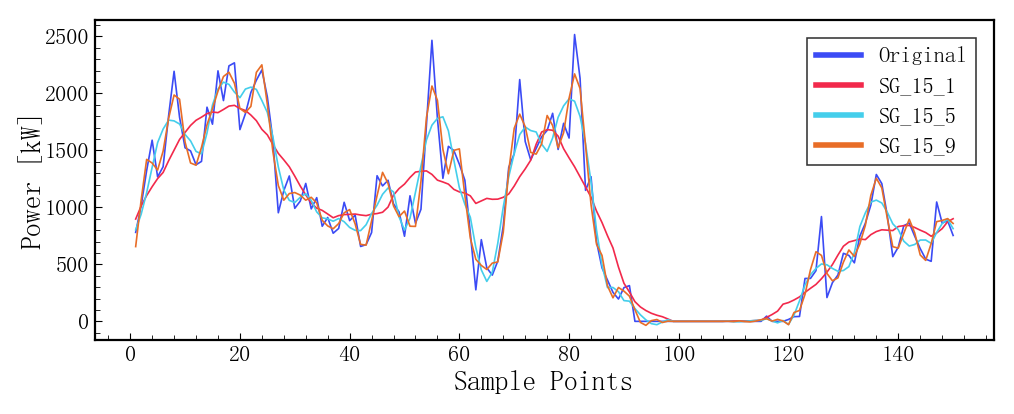

In [46]:
a = 400
b = a+150
y1 = serScada['theoretical power(kW)'].values[a:b]
y2 = savgol_filter(serScada['theoretical power(kW)'].values, 15, 1)[a:b]
y3 = savgol_filter(serScada['theoretical power(kW)'].values, 15, 5)[a:b]
y4 = savgol_filter(serScada['theoretical power(kW)'].values, 15, 9)[a:b]
x = np.array(range(len(y1)))+1

matplotlib.rcdefaults()  # 将配置重置为默认值
# matplotlib.use("Agg")
# matplotlib.rcParams['text.usetex'] = True  # 全局开启
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题/让负号正常显示
config = {
            "font.family": 'serif',
            "font.size": 21,
            "mathtext.fontset": 'stix',
            "font.serif": ['SimSun'],
         }
plt.rcParams.update(config)
fig, ax = plt.subplots(figsize=(5.5, 2.5), dpi=200)

linew = 0.6
colors = ['#3B4BF5', '#F2294B', '#44CEEB', '#E86D27']

ax.plot(x, y1,
        label='Original',
        ls='-',
        linewidth=linew,
        color=colors[0],
        alpha=1,
#         marker='^',
        markersize=3,
        markeredgecolor='#FD6174',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y2,
        label='SG_15_1',
        ls='-',
        linewidth=linew,
        color=colors[1],
        alpha=1,
#         marker='d',
        markersize=3,
        markeredgecolor='#00A2FF',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y3,
        label='SG_15_5',
        ls='-',
        linewidth=linew,
        color=colors[2],
        alpha=1,
#         marker='s',
        markersize=3,
        markeredgecolor='#5858ff',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y4,
        label='SG_15_9',
        ls='-',
        linewidth=linew,
        color=colors[3],
        alpha=1,
#         marker='s',
        markersize=3,
        markeredgecolor='#5858ff',
        markeredgewidth=0.5,
        markerfacecolor='none')

# 横轴设置
plt.xticks(x)
ax.set_xlabel('Sample Points', fontsize=10, labelpad=2)  # 设置 x 轴标签、字体大小
ax.tick_params(axis='x', direction='in', pad=2, labelsize=8, length=2.7, width=0.4, rotation=0)  # x 轴刻度值大小
ax.tick_params(axis="x", which='minor', direction='in', length=1.7, width=0.3) # , color="green"
# 主刻度间隔数量
# ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(20)) # MultipleLocator()函数设置了x轴相邻显示点的间隔
# 次刻度标签的位置
ax.xaxis.set_minor_locator(plt.MultipleLocator(4)) #将此y轴次刻度标签设置为 的倍数/
# plt.xlim((1, 32))

# 纵轴设置
ax.set_ylabel(r'Power [kW]', fontsize=10, labelpad=0)  # 设置第 1 个 y 轴特征标签字体颜色、大小r'\textit{'+plot1.columns.values[0]+'}'
ax.tick_params(axis='y', direction='in', pad=2, labelsize=8, length=2.4, width=0.4)  # 第 1 个 y 轴刻度值字体颜色大小, labelcolor=color
ax.tick_params(axis="y", which='minor', direction='in', length=1.7, width=0.3) # , color="green"
# 设置主刻度标签的位置
ax.yaxis.set_major_locator(plt.MultipleLocator(500)) #将y轴主刻度标签设置为 的倍数
# 设置次刻度标签的位置
ax.yaxis.set_minor_locator(plt.MultipleLocator(100)) #将此y轴次刻度标签设置为 的倍数/
# plt.ylim((-20, 440))

# 设置刻度轴旋转角度：使用ax.tick_params
# ax.tick_params(axis='x', direction='in', labelsize=10, pad=5, labelrotation=0) #选择x轴
# ax.tick_params(axis='y', direction='in', labelsize=10, pad=5)

# 显示图例
plt.legend()
legend = plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.78, .98), ncol=1,fancybox=False,
                    facecolor='white',edgecolor='black', fontsize=8) # (0.01, 0.99)
frame = legend.get_frame()
frame.set_linewidth(0.57) # 设置图例边框线宽
# set the linewidth of each legend object
for legobj in legend.legendHandles:
	legobj.set_linewidth(2)
# plt.grid(ls='--', linewidth=0.4)  # 网格
plt.tight_layout()
plt.savefig('output/compare_result_filter_tp_sg_15_1-9.png', dpi=600)
plt.show()
plt.close(fig)

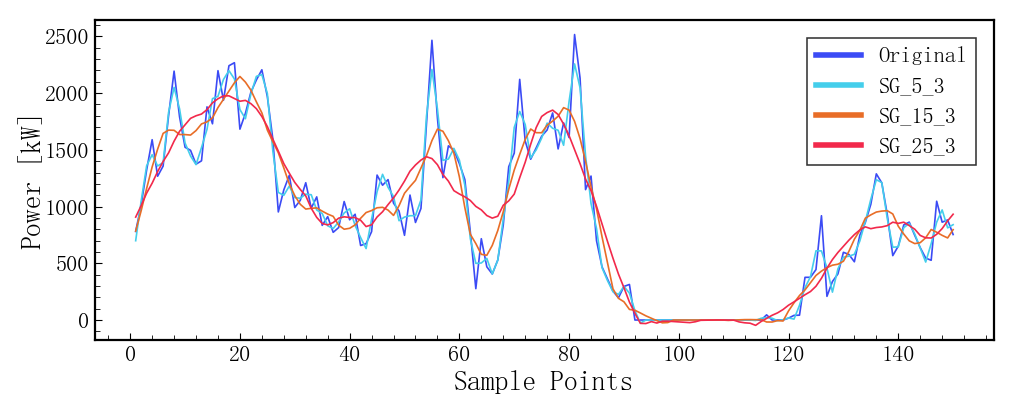

In [44]:
a = 400
b = a+150
y1 = serScada['theoretical power(kW)'].values[a:b]
y2 = savgol_filter(serScada['theoretical power(kW)'].values, 5, 3)[a:b]
y3 = savgol_filter(serScada['theoretical power(kW)'].values, 15, 3)[a:b]
y4 = savgol_filter(serScada['theoretical power(kW)'].values, 25, 3)[a:b]
x = np.array(range(len(y1)))+1

matplotlib.rcdefaults()  # 将配置重置为默认值
# matplotlib.use("Agg")
# matplotlib.rcParams['text.usetex'] = True  # 全局开启
# plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题/让负号正常显示
config = {
            "font.family": 'serif',
            "font.size": 21,
            "mathtext.fontset": 'stix',
            "font.serif": ['SimSun'],
         }
plt.rcParams.update(config)
fig, ax = plt.subplots(figsize=(5.5, 2.5), dpi=200)

linew = 0.6
colors = ['#3B4BF5', '#44CEEB', '#E86D27', '#F2294B']

ax.plot(x, y1,
        label='Original',
        ls='-',
        linewidth=linew,
        color=colors[0],
        alpha=1,
#         marker='^',
        markersize=3,
        markeredgecolor='#FD6174',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y2,
        label='SG_5_3',
        ls='-',
        linewidth=linew,
        color=colors[1],
        alpha=1,
#         marker='d',
        markersize=3,
        markeredgecolor='#00A2FF',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y3,
        label='SG_15_3',
        ls='-',
        linewidth=linew,
        color=colors[2],
        alpha=1,
#         marker='s',
        markersize=3,
        markeredgecolor='#5858ff',
        markeredgewidth=0.5,
        markerfacecolor='none')
ax.plot(x, y4,
        label='SG_25_3',
        ls='-',
        linewidth=linew,
        color=colors[3],
        alpha=1,
#         marker='s',
        markersize=3,
        markeredgecolor='#5858ff',
        markeredgewidth=0.5,
        markerfacecolor='none')

# 横轴设置
plt.xticks(x)
ax.set_xlabel('Sample Points', fontsize=10, labelpad=2)  # 设置 x 轴标签、字体大小
ax.tick_params(axis='x', direction='in', pad=2, labelsize=8, length=2.7, width=0.4, rotation=0)  # x 轴刻度值大小
ax.tick_params(axis="x", which='minor', direction='in', length=1.7, width=0.3) # , color="green"
# 主刻度间隔数量
# ax = plt.gca()
ax.xaxis.set_major_locator(plt.MultipleLocator(20)) # MultipleLocator()函数设置了x轴相邻显示点的间隔
# 次刻度标签的位置
ax.xaxis.set_minor_locator(plt.MultipleLocator(4)) #将此y轴次刻度标签设置为 的倍数/
# plt.xlim((1, 32))

# 纵轴设置
ax.set_ylabel(r'Power [kW]', fontsize=10, labelpad=0)  # 设置第 1 个 y 轴特征标签字体颜色、大小r'\textit{'+plot1.columns.values[0]+'}'
ax.tick_params(axis='y', direction='in', pad=2, labelsize=8, length=2.4, width=0.4)  # 第 1 个 y 轴刻度值字体颜色大小, labelcolor=color
ax.tick_params(axis="y", which='minor', direction='in', length=1.7, width=0.3) # , color="green"
# 设置主刻度标签的位置
ax.yaxis.set_major_locator(plt.MultipleLocator(500)) #将y轴主刻度标签设置为 的倍数
# 设置次刻度标签的位置
ax.yaxis.set_minor_locator(plt.MultipleLocator(100)) #将此y轴次刻度标签设置为 的倍数/
# plt.ylim((-20, 440))

# 设置刻度轴旋转角度：使用ax.tick_params
# ax.tick_params(axis='x', direction='in', labelsize=10, pad=5, labelrotation=0) #选择x轴
# ax.tick_params(axis='y', direction='in', labelsize=10, pad=5)

# 显示图例
plt.legend()
legend = plt.legend(loc='upper left', frameon=True, bbox_to_anchor=(0.78, .98), ncol=1,fancybox=False,
                    facecolor='white',edgecolor='black', fontsize=8) # (0.01, 0.99)
frame = legend.get_frame()
frame.set_linewidth(0.57) # 设置图例边框线宽
# set the linewidth of each legend object
for legobj in legend.legendHandles:
	legobj.set_linewidth(2)
# plt.grid(ls='--', linewidth=0.4)  # 网格
plt.tight_layout()
plt.savefig('output/compare_result_filter_tp_sg_k3.png', dpi=600)
plt.show()
plt.close(fig)